# Multi-class Classification

Dataset: [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist)
It contains 28x28 images of hands depicting the 26 letters of the english alphabet.

In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Download the training and test sets (the test set will actually be used as a validation set):

In [2]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 65.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 72.1MB/s]


Some globals with the path to both files those were just downloaded:

In [3]:
TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

How the data looks like within the `csv` file:

In [5]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

Each file includes a header (the first line) and each subsequent data point is represented as a line that contains 785 values.

The first value is the label (the numeric representation of each letter) and the other 784 values are the value of each pixel of the image.
Original images have a resolution of 28x28, which sums up to 784 pixels.

 ## Parsing the dataset

 Now complete the `parse_data_from_input` below.

 This function will read a file passed as input and return 2 numpy arrays, one containing the labels and one containing the 28x28 representation of each image within the file. These numpy arrays should have type `float64`.


In [6]:
def parse_data_from_input(filename):
  with open(filename) as file:

    csv_reader = csv.reader(file, delimiter=',')
    labels = []
    images = []
    count = 0
    for row in csv_reader:
      if count == 0:
        count = 1
        continue
      labels.append(row[0])
      images.append(np.array(row[1:], dtype="float64").reshape(28,28))

    labels = np.array(labels, dtype="float64")
    images = np.asarray(images)

    return images, labels

In [7]:
# Testing function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


## Visualizing the numpy arrays

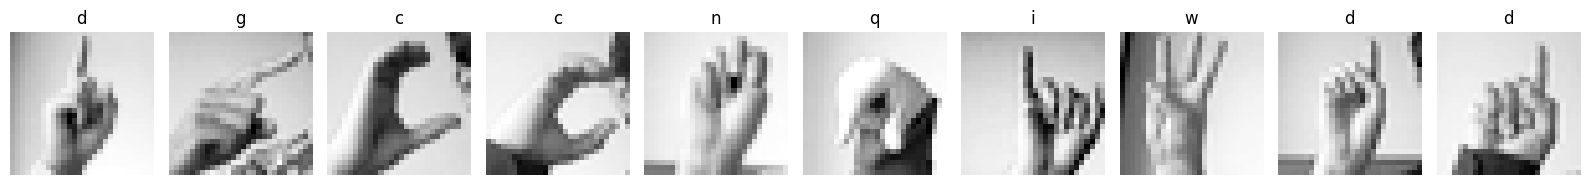

In [8]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

## Creating the generators for the CNN

In [9]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):

  training_images = training_images[..., np.newaxis]
  validation_images = validation_images[..., np.newaxis]

  # print(np.shape(training_images))
  # print(np.shape(validation_images))
  # print(np.shape(training_labels))
  # print(np.shape(validation_labels))

  # Instantiate the ImageDataGenerator class
  # First we have to normalize pixel values and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

  return train_generator, validation_generator

In [10]:
# Testing generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Coding the CNN

In [11]:
def create_model():

  # Define the model
  model = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                               tf.keras.layers.MaxPooling2D(2, 2),
                               tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                               tf.keras.layers.MaxPooling2D(2, 2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(512, activation='relu'),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax)

  ])


  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=["accuracy"])

  return model

In [12]:
# Instantiate model
model = create_model()

# print(model.summary())
tf.keras.utils.plot_model(model)

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


858/858 [==============================] - 19s 16ms/step - loss: 2.8131 - accuracy: 0.1427 - val_loss: 1.8225 - val_accuracy: 0.4177
Epoch 2/15
858/858 [==============================] - 18s 21ms/step - loss: 1.9007 - accuracy: 0.3875 - val_loss: 1.0473 - val_accuracy: 0.6106
Epoch 3/15
858/858 [==============================] - 15s 18ms/step - loss: 1.3576 - accuracy: 0.5465 - val_loss: 0.6434 - val_accuracy: 0.7415
Epoch 4/15
858/858 [==============================] - 14s 16ms/step - loss: 1.0598 - accuracy: 0.6444 - val_loss: 0.4839 - val_accuracy: 0.8208
Epoch 5/15
858/858 [==============================] - 13s 15ms/step - loss: 0.8567 - accuracy: 0.7074 - val_loss: 0.4192 - val_accuracy: 0.8525
Epoch 6/15
858/858 [==============================] - 14s 16ms/step - loss: 0.7357 - accuracy: 0.7498 - val_loss: 0.2274 - val_accuracy: 0.9170
Epoch 7/15
858/858 [==============================] - 14s 16ms/step - loss: 0.6515 - accuracy: 0.7818 - val_loss: 0.1845 - val_accuracy: 0.9385
Epo

Taking a look at training history:

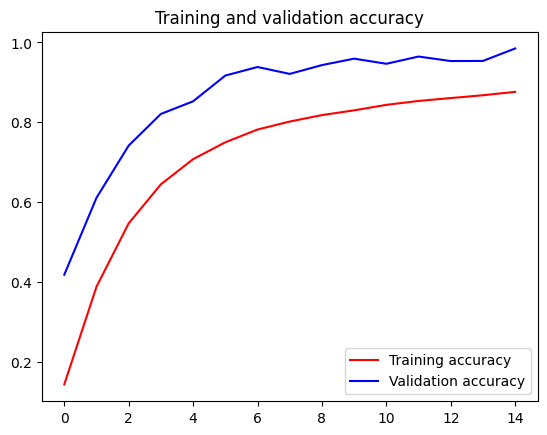

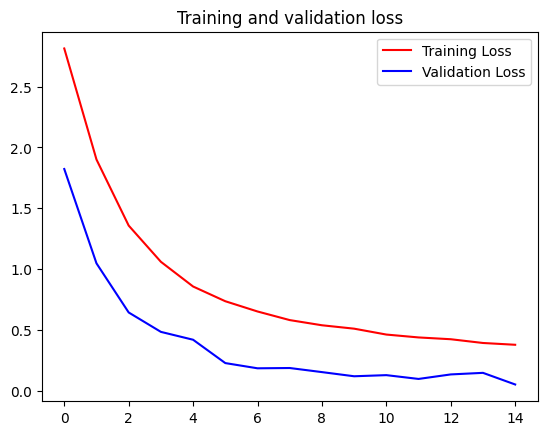

In [13]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()